# Data Wrangling For the WeRateDogs Tweets Dataset

## Introduction

WeRateDogs <a href='https://twitter.com/dog_rates'>(@dog_rates)</a> is a famous twitter account that rates dogs that people send. Rating are usually funny and include a non genric rating system using a rating higher than the scale, like 13/10. In this report I'll be doing data wrangling on a tweet archive of this user, and including information from a dog classification neural network, and the twitter api.

## Gather

First step in the wrangling process is Gathering.

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import re

%matplotlib inline

We read the tweet archive that we downloaded and we store it in `tweet` DataFrame

In [2]:
tweets = pd.read_csv('twitter-archive-enhanced.csv')
tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


We then need to download the predictions file using the `requests` library

In [3]:
#downloading the file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# r = requests.get(url, allow_redirects=True)
# with open('image-predictions.tsv', 'wb') as f:
#     f.write(r.content)

After we download it, we store it into the `predict` DataFrame

In [4]:
predictions = pd.read_csv('image-predictions.tsv',sep ='\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Lastly, we query the twitter api using the tweet ID's to get more information

In [5]:
if False:
    import tweepy
    from tweepy import OAuthHandler
    from timeit import default_timer as timer

    # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
    # These are hidden to comply with Twitter's API terms and conditions
    consumer_key = 'HIDDEN'
    consumer_secret = 'HIDDEN'
    access_token = 'HIDDEN'
    access_secret = 'HIDDEN'

    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)

    # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
    # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
    # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
    # NOTE TO REVIEWER: this student had mobile verification issues so the following
    # Twitter API code was sent to this student from a Udacity instructor
    # Tweet IDs for which to gather additional data via Twitter's API
    tweet_ids = tweets.tweet_id.values
    len(tweet_ids)

    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
    # Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [6]:
#read the lines into a list of dictionaries using JSON data lines
data_list = []
with open('tweet-json.txt') as f:
  for line in f:
    data_list.append(json.loads(line))

In [7]:
#create a dataframe from tweet infos list
tweet_info = pd.DataFrame(data_list, columns = ['id','favorite_count', 'retweet_count', 'created_at'])
tweet_info.head()

,id,favorite_count,retweet_count,created_at
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017


## Assess

After gathering the data, we need to assess it to know what we should work on.

#### Visual Assessment

First thing we cand do to asses the data is look at it vissually, this helps us understand how the data look and see any obvious problems.

In [8]:
tweets.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
1881,675003128568291329,NaN,NaN,2015-12-10 17:24:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Laela. She's adorable. Magnificent eyes. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675003128...,12,10,Laela,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1747,679111216690831360,NaN,NaN,2015-12-22 01:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is officially the greatest yawn of all ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679111216...,12,10,officially,None,None,None,None
2017,672160042234327040,NaN,NaN,2015-12-02 21:06:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubba. He's a Titted Peebles Aorta. Ev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672160042...,8,10,Bubba,None,None,pupper,None
125,868622495443632128,NaN,NaN,2017-05-28 00:18:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a h*ckin peaceful boy. Unbothered by th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/868622495...,13,10,None,None,None,None,None
803,772152991789019136,NaN,NaN,2016-09-03 19:23:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a couple rufferees making sure all the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772152991...,10,10,None,None,None,None,None
1859,675497103322386432,NaN,NaN,2015-12-12 02:07:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reggie. He's going for the world record. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675497103...,11,10,Reggie,None,None,None,None
170,859074603037188101,NaN,NaN,2017-05-01 15:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an exotic dog. Good at ukulele. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859074603...,13,10,None,None,None,None,None


We can see a lot of NaN Values, but that's expected since this means it wasn't a reply retweet.

In [9]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
tweet_info

,id,favorite_count,retweet_count,created_at
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,20562,3261,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,12041,2158,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,56848,16716,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,28226,4429,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,32467,7711,Wed Jul 26 15:59:51 +0000 2017


The `created_at` column has bad format for values. Also we can see that the tables have different number of rows, so probably some tweets are missing image predictions

#### Programatical Assessment

In [11]:
tweets.info()
tweets.describe()
tweets['rating_numerator'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
#checking weird nominators
list(tweets[tweets['rating_numerator'] == 0].text)

["When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag",
 "PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"]

In [13]:
tweets['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
#checking weird denominators
list(tweets[tweets['rating_denominator'] == 0].text)

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"]

In [15]:
tweets[tweets.duplicated(subset=['tweet_id'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [16]:
#retweets
tweets[~tweets['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [17]:
#originals
tweets[tweets['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [18]:
#replies
tweets[~tweets['in_reply_to_user_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [19]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
predictions[predictions.duplicated(subset=['tweet_id'])]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [21]:
predictions[predictions.duplicated(subset=['jpg_url'])]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [22]:
predictions[predictions['jpg_url'] == 'https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
713,685325112850124800,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.39826,True,kuvasz,0.00541,True
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.39826,True,kuvasz,0.00541,True


In [23]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
created_at        2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [24]:
tweet_info[tweet_info.duplicated(subset=['id'])]

,id,favorite_count,retweet_count,created_at


In [25]:
tweets[tweets['name'].map(len) <3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [26]:
tweets['name'][tweets['name'].map(len) <=3].value_counts()

a      55
Bo      9
the     8
an      7
Jax     6
Leo     6
Gus     5
one     4
Mia     3
Ted     3
Max     3
Ava     2
not     2
Bob     2
Eve     2
Ken     2
Ash     2
Tyr     2
Eli     2
mad     2
Moe     2
Lou     2
Doc     2
Sam     2
Ike     1
Ito     1
Ace     1
Al      1
Amy     1
Dex     1
       ..
Pip     1
Dot     1
Mac     1
Gin     1
Tug     1
by      1
all     1
Edd     1
Obi     1
Zoe     1
Stu     1
Ron     1
Ole     1
Mo      1
Cal     1
Blu     1
Aja     1
Sky     1
JD      1
Jim     1
Jay     1
Jo      1
Dug     1
Jed     1
Alf     1
my      1
Jeb     1
Rey     1
Evy     1
Ed      1
Name: name, Length: 68, dtype: int64

### Issues

#### Quality
<ul>
    <li>`source` in tweets df has bad format, HTML tag.</li>
    <li>`in_reply_to_status_id` should be an str object instead of float, so it doesn't show in scientific notation.</li>
    <li> `retweeted_status_timestamp` and `timestamp` in `tweets` should be a datatime instead of object. </li>
    <li>`tweets` contains some retweets, we are only considered in original tweets.</li>
    <li> some denominator values are wrong (0), we should fix them and check values are correct </li>
    <li> `created_at` in `tweet_info` should be a datatime aswell
    <li>`in_reply_to_user_id` should be an object instead of float.</li>
    <li>`predictions` contaitns duplicate dog pics, so there are retweets</li>
    <li>`tweets` has some extra tweets with no predictions (predictions only 2075)</li>
    <li> `tweets` has some dogs names are wrong like 'a' and 'an'</li>
    <li> We should make predictions more compact. We only need the first prediction + whether it's a dog or not + tweet id and picture</li>
    <li>Tweet Info has missnamed columns. id -> tweet_id, created_at -> timestamp</li>
</ul>

#### Tidiness
<ul>
    <li>4 columns for dog type (doggo, pupper, etc.) should be replaced by type column</li>
    <li>Joining tables, we only need prediction from predictions table, and retweet counts from tweet info</li>
</ul>



Final step of the data wrangling, after we gathered the data and looked at it, we need to clean it. We do that by defining, coding, then testing.

## Clean

Final step of the data wrangling, after we gathered the data and looked at it, we need to clean it. We do that by defining, coding, then testing.

Firsst, we should make new copy dfs to have the original data at hand.

In [27]:
tweets_clean = pd.DataFrame.copy(tweets)
predictions_clean = pd.DataFrame.copy(predictions)
tweet_info_clean = pd.DataFrame.copy(tweet_info)

#### Define

Bad format for the `source` column in the `tweets` df

#### Code

In [28]:
#apply to evey row of the source column a function that splits by quotes and takes the 2nd value
tweets_clean['source'] = tweets_clean['source'].apply(lambda x: x.split('"')[1])

#### Test

In [29]:
tweets_clean.sample(30).source

2304    http://twitter.com/download/iphone
1681    http://twitter.com/download/iphone
220     http://twitter.com/download/iphone
1881    http://twitter.com/download/iphone
1900    http://twitter.com/download/iphone
1534                        http://vine.co
1091    http://twitter.com/download/iphone
817     http://twitter.com/download/iphone
1934    http://twitter.com/download/iphone
940     http://twitter.com/download/iphone
804     http://twitter.com/download/iphone
112     http://twitter.com/download/iphone
1998    http://twitter.com/download/iphone
530     http://twitter.com/download/iphone
1837    http://twitter.com/download/iphone
237     http://twitter.com/download/iphone
1074    http://twitter.com/download/iphone
1830    http://twitter.com/download/iphone
1829    http://twitter.com/download/iphone
1406    http://twitter.com/download/iphone
1071    http://twitter.com/download/iphone
1114    http://twitter.com/download/iphone
2198    http://twitter.com/download/iphone
734     htt

#### Define

Bad format `in_reply_to_status_id` and  `in_reply_to_user_id` in `tweets`. should be an object instead of float, so it doesn't show in scientific notation, and we don't need to do operation on it.

#### Code

In [30]:
#apply to evey row of in_reply_to_status_id and in_reply_to_user_id column a cast to string
tweets_clean['in_reply_to_status_id'] = tweets_clean['in_reply_to_status_id'].apply(
    lambda x: "N/a" if pd.isnull(x) else str(int(x)))
tweets_clean['in_reply_to_user_id'] = tweets_clean['in_reply_to_user_id'].apply(
    lambda x: "N/a" if pd.isnull(x) else str(int(x)))

#### Test

In [31]:
tweets_clean[~(tweets_clean['in_reply_to_status_id'] == "N/a")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,886266357075128320,2281181600,2017-07-15 16:51:35 +0000,http://twitter.com/download/iphone,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,881607037314052096,47384430,2017-07-02 21:58:53 +0000,http://twitter.com/download/iphone,@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,879553827334172672,3105440746,2017-06-27 12:14:36 +0000,http://twitter.com/download/iphone,@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,870726202742493184,16487760,2017-06-02 19:38:25 +0000,http://twitter.com/download/iphone,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,863425645568774144,77596200,2017-05-13 16:15:35 +0000,http://twitter.com/download/iphone,@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,667152164079423488,4196983835,2017-05-12 17:12:53 +0000,http://twitter.com/download/iphone,Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,857156678055342080,180670967,2017-04-26 12:48:51 +0000,http://twitter.com/download/iphone,@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,855818117272018944,4196983835,2017-04-24 15:13:52 +0000,http://twitter.com/download/iphone,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,856286004109553664,279280991,2017-04-23 23:26:03 +0000,http://twitter.com/download/iphone,@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,855861584463351808,194351775,2017-04-22 19:15:32 +0000,http://twitter.com/download/iphone,@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


#### Define

`retweeted_status_timestamp` and `timestamp` in `tweets` should be a datatime instead of object. So it's easier to read and work with.

#### Code

In [32]:
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean['timestamp'])
#not really needed since we're removing retweets later
# tweets['retweeted_status_timestamp'] = pd.to_datetime(tweets['retweeted_status_timestamp'])

#### Test

In [33]:
tweets_clean['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-21 01:02:36
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

#### Define

`tweets` contains some retweets, we are only considered in original tweets, so we need to remove rows with retweet id.

#### Code

In [34]:
tweets_clean = tweets_clean[tweets_clean['retweeted_status_id'].isnull()]

#### Test

In [35]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), f

#### Define

Fixing `rating_numerator` and `rating_numerator` that have 0 values.

#### Code

In [36]:
#extracts the numenator and denomenator from tweets using regular expression and fix archive entry if wrong
#We do this by applying this function to every tweet.
#This function finds a RE of the form (number)/(number>0)
#Then assigns these values to the numenator and denomenator columns
def check_num_and_denom(tweet):
    match = re.search('(\d+(?:\.\d+)?)\/(\d+(?:\.\d+)?)', tweet.text) #reg exp forces denomenator to be greater than 0 (including decimal points)
    if match == None:
        print("None: " + tweet.text)
    else:
        num, denom = match.group().split('/')
        if (num != str(tweet.rating_numerator)) or (denom != str(tweet.rating_denominator)):
            print(tweet.text, tweet.rating_numerator, tweet.rating_denominator)
            print("num is: " + num)
            print("den is: " + denom)
            tweet.rating_numerator = float(num)
            tweet.rating_denominator = float(denom)   
    return tweet

#apply the function to every tweet
tweets_clean = tweets_clean.apply(check_num_and_denom, axis=1)

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 5 10
num is: 13.5
den is: 10
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho 960 0
num is: 960
den is: 00
I was going to do 007/10, but the joke wasn't worth the &lt;10 rating 7 10
num is: 007
den is: 10
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS 75 10
num is: 9.75
den is: 10
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq 27 10
num is: 11.27
den is: 10
I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace 5 10
num is: 9.5
den is: 10
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD 26 10
num is: 

#### Test

In [37]:
tweets_clean[ tweets_clean.rating_denominator <= 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,835245984028504064,26259576,2017-02-24 21:54:03,http://twitter.com/download/iphone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960.0,0.0,None,None,None,None,None


#### Define

`created_at` in `tweet_info` should be a datatime.

#### Code

In [38]:
tweet_info_clean['created_at'] = pd.to_datetime(tweet_info_clean['created_at'])

#### Test

In [39]:
tweet_info_clean.sample(10)

,id,favorite_count,retweet_count,created_at
1031,745074613265149952,8605,3976,2016-06-21 02:03:25
2241,667902449697558528,905,396,2015-11-21 03:08:47
889,759557299618865152,5202,1341,2016-07-31 01:12:26
1130,728760639972315136,5090,1911,2016-05-07 01:37:30
26,886736880519319552,12306,3443,2017-07-16 23:58:41
834,767884188863397888,5309,1634,2016-08-23 00:40:31
1203,715928423106027520,3485,987,2016-04-01 15:46:52
495,813157409116065792,8588,2557,2016-12-25 23:00:08
1550,688916208532455424,3003,983,2016-01-18 02:49:58
511,811744202451197953,8429,1884,2016-12-22 01:24:33


#### Define

`predictions` contaitns duplicate dog pics, so there are retweets, we fix that by removing rows with duplicate pics

#### Code

In [40]:
##This whole thing can be done more easily when we merge the two dataframes, but I wanted to clean it here as
##a general way to solve this problem.

dup_count = predictions_clean.duplicated(subset=['jpg_url']).sum()

#Get all ids of duplicates
dup_ids = predictions_clean[predictions_clean.duplicated(subset=['jpg_url'],keep =False)].tweet_id 

#Find values that don't exist in tweets, to drop them
drop_idx = dup_ids.map(lambda x: x not in tweets_clean['tweet_id'].unique())
not_found_count = drop_idx.sum()

print("There are {} duplicates, and {} ids were not found in 'tweets_clean'".format(dup_count,not_found_count))

predictions_clean = predictions_clean.drop(dup_ids[drop_idx].index)

There are 66 duplicates, and 66 ids were not found in 'tweets_clean'


#### Test

In [41]:
predictions_clean.info() #removed the 66 duplicates (2075 -> 2009 entries)
predictions_clean.duplicated(subset=['jpg_url']).sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


0

#### Define

`tweets` has extra rows that have no predictions, remove those rows by checking ids with `predictions`

#### Code

In [42]:
tweets_clean.info()
pred_ids = predictions_clean['tweet_id']
tweets_ids = tweets_clean['tweet_id']

non_matching_ids = tweets_ids.map(lambda x: x not in pred_ids.unique())
print("{} tweets have no predictions".format(non_matching_ids.sum()))
tweets_clean = tweets_clean.drop(tweets_ids[non_matching_ids].index)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](

#### Test

In [43]:
tweets_clean.info()

pred_ids = predictions_clean['tweet_id']
tweets_ids = tweets_clean['tweet_id']

non_matching_ids = tweets_ids.map(lambda x: x not in pred_ids.unique())
print("{} tweets have no predictions".format(non_matching_ids.sum()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         1994 non-null object
in_reply_to_user_id           1994 non-null object
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null float64
rating_denominator            1994 non-null float64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: datetime64[ns](

#### Define

`tweets` Some Dogs with no mentioned names have wrong names like 'a' and 'an'

#### Code

In [44]:
#I noticed from the analysis that real names always start with uppercase
def name_check(name):
    if name == 'None' or name == None: #first case: names are 'None'
        return 'N/a'
    if len(name) <=3 and name[0].islower(): #second case: names are short and start with lowercase
        return 'N/a'
    return name
tweets_clean['name'] = tweets_clean['name'].map(name_check)

#### Test

In [45]:
tweets_clean['name'][(tweets_clean['name'].map(len) <=3) & (tweets_clean['name']!='N/a')]

6       Jax
13      Ted
16      Jim
49      Gus
53      Rey
77      Aja
92      Jed
217     Leo
270     Max
304     Ava
308     Eli
311     Ash
360     Mia
361     Leo
392     Ike
393      Mo
449      Bo
454     Tom
463     Ken
486     Alf
491     Sky
503     Tyr
510     Moe
511     Ted
516     Sam
520     Gus
526     Ito
553      Bo
582     Doc
613     Tyr
       ... 
1683     Bo
1741    Evy
1755    Tug
1756    Mia
1809    Ash
1879    Moe
1899    Jeb
1909    Ava
1919    Bob
1921    Gus
1946    Dot
1970    Eve
1971    Mac
1988     Ed
1996    Taz
2014    Cal
2027    Mia
2041     JD
2045    Jax
2050    Pip
2057    Lou
2078    Amy
2096    Gin
2106    Edd
2114    Sam
2137    Ben
2168    Dug
2219     Jo
2233    Ron
2245    Stu
Name: name, Length: 88, dtype: object

In [46]:
tweets_clean['name'][tweets_clean['name'].map(lambda name: name in ["a", "an", "the", "by", "not"])]

Series([], Name: name, dtype: object)

#### Define

We should make predictions more compact. We only need the first prediction + whether it's a dog or not + tweet id and picture

#### Code

In [47]:
predictions_clean = predictions_clean[['tweet_id', 'jpg_url', 'p1', 'p1_dog','p1_conf']]

#### Test

In [48]:
predictions_clean.head()

,tweet_id,jpg_url,p1,p1_dog,p1_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,True,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,True,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,True,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,True,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,True,0.560311


#### Define

`tweet_info` has missnamed columns. id -> tweet_id, created_at -> timestamp

#### Code

In [49]:
#rename columns
tweet_info_clean = tweet_info_clean.rename(columns={'id': 'tweet_id'})

#### Test

In [50]:
tweet_info_clean

,tweet_id,favorite_count,retweet_count,created_at
0,892420643555336193,39467,8853,2017-08-01 16:23:56
1,892177421306343426,33819,6514,2017-08-01 00:17:27
2,891815181378084864,25461,4328,2017-07-31 00:18:03
3,891689557279858688,42908,8964,2017-07-30 15:58:51
4,891327558926688256,41048,9774,2017-07-29 16:00:24
5,891087950875897856,20562,3261,2017-07-29 00:08:17
6,890971913173991426,12041,2158,2017-07-28 16:27:12
7,890729181411237888,56848,16716,2017-07-28 00:22:40
8,890609185150312448,28226,4429,2017-07-27 16:25:51
9,890240255349198849,32467,7711,2017-07-26 15:59:51


#### Define

4 columns for dog type (doggo, pupper, etc.) should be replaced by type column

#### Code

In [51]:
types_cols = ['doggo','floofer','pupper','puppo']
def con_types(row):
    ret = ""
    for col in types_cols:
        if (row[col]) != 'None':
            if ret == "":
                ret += col
            else:
                ret += ","+col
    if ret == "":
        return None
    return ret

print(tweets_clean[types_cols].apply(pd.Series.value_counts)) #74 doggo, 8 floofer, 212 pupper, 23 puppo (some dogs have multiple types)
tweets_clean['type'] = tweets_clean.apply(con_types, axis=1)

          doggo  floofer  pupper   puppo
None     1920.0   1986.0  1782.0  1971.0
doggo      74.0      NaN     NaN     NaN
floofer     NaN      8.0     NaN     NaN
pupper      NaN      NaN   212.0     NaN
puppo       NaN      NaN     NaN    23.0


#### Test

In [52]:
tweets_clean['type'].value_counts() #totals add up to same values

pupper           203
doggo             63
puppo             22
doggo,pupper       9
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: type, dtype: int64

In [53]:
tweets_clean[np.append(types_cols,'type')].head(30)

,doggo,floofer,pupper,puppo,type
0,None,None,None,None,None
1,None,None,None,None,None
2,None,None,None,None,None
3,None,None,None,None,None
4,None,None,None,None,None
5,None,None,None,None,None
6,None,None,None,None,None
7,None,None,None,None,None
8,None,None,None,None,None
9,doggo,None,None,None,doggo


In [54]:
tweets_clean[np.append(types_cols,'type')].loc[(tweets_clean[types_cols] != 'None'
                 ).sum(axis=1) > 1]

,doggo,floofer,pupper,puppo,type
191,doggo,None,None,puppo,"doggo,puppo"
200,doggo,floofer,None,None,"doggo,floofer"
460,doggo,None,pupper,None,"doggo,pupper"
531,doggo,None,pupper,None,"doggo,pupper"
565,doggo,None,pupper,None,"doggo,pupper"
575,doggo,None,pupper,None,"doggo,pupper"
705,doggo,None,pupper,None,"doggo,pupper"
889,doggo,None,pupper,None,"doggo,pupper"
956,doggo,None,pupper,None,"doggo,pupper"
1063,doggo,None,pupper,None,"doggo,pupper"


In [55]:
#now we can drop the un-needed columns
tweets_clean = tweets_clean.drop(columns = types_cols)

#### Define

Joining tables, we only need prediction from predictions table, and retweet counts from tweet info

#### Code

In [56]:
#clean unwanted colms first
drop_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
tweets_clean = tweets_clean.drop(columns=drop_cols)

In [57]:
drop_cols = ['created_at']
tweet_info_clean = tweet_info_clean.drop(columns=drop_cols)

In [58]:
#merge tables
tweets_clean = tweets_clean.merge(tweet_info_clean, on='tweet_id')
tweets_clean = tweets_clean.merge(predictions_clean, on='tweet_id')

#### Test

In [59]:
tweets_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
type                     306 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
p1                       1994 non-null object
p1_dog                   1994 non-null bool
p1_conf                  1994 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(9)
memory usage: 266.8+ KB


In [60]:
tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,favorite_count,retweet_count,jpg_url,p1,p1_dog,p1_conf
0,892420643555336193,N/a,N/a,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,False,0.097049
1,892177421306343426,N/a,N/a,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,True,0.323581
2,891815181378084864,N/a,N/a,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,True,0.716012
3,891689557279858688,N/a,N/a,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,False,0.170278
4,891327558926688256,N/a,N/a,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,True,0.555712


Finally, we should just rename some of the comlumns to make more sense, then save the csv file to read in the actual report.

In [61]:
tweets_clean = tweets_clean.rename(index=str, columns={"p1": "prediction", "p1_dog": "is_dog", "p1_conf":"prediction_conf"})
tweets_clean.info()
tweets_clean.to_csv('twitter_archive_master.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
type                     306 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
prediction               1994 non-null object
is_dog                   1994 non-null bool
prediction_conf          1994 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(9)
memory usage: 266.8+ KB


In [62]:
tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,favorite_count,retweet_count,jpg_url,prediction,is_dog,prediction_conf
0,892420643555336193,N/a,N/a,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,False,0.097049
1,892177421306343426,N/a,N/a,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,True,0.323581
2,891815181378084864,N/a,N/a,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,True,0.716012
3,891689557279858688,N/a,N/a,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,False,0.170278
4,891327558926688256,N/a,N/a,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,True,0.555712


## Analysis

Now that data is all cleaned up, we should look into it and try to find some patterns and interesting features.

In [63]:
#read the master df that we just saved
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
type                     306 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
prediction               1994 non-null object
is_dog                   1994 non-null bool
prediction_conf          1994 non-null float64
dtypes: bool(1), float64(3), int64(3), object(10)
memory usage: 251.3+ KB


In [64]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,favorite_count,retweet_count,jpg_url,prediction,is_dog,prediction_conf
0,892420643555336193,N/a,N/a,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,False,0.097049
1,892177421306343426,N/a,N/a,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,True,0.323581
2,891815181378084864,N/a,N/a,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,True,0.716012
3,891689557279858688,N/a,N/a,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,False,0.170278
4,891327558926688256,N/a,N/a,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,True,0.555712


### Type Distribution
First thing I want to see is the distribution of dog types.

In [65]:
counts = df.type[df.type != 'N/a'].value_counts().sort_index()
print(counts)

doggo             63
doggo,floofer      1
doggo,pupper       9
doggo,puppo        1
floofer            7
pupper           203
puppo             22
Name: type, dtype: int64


We see that some dogs have multiple type. I decided that I want to count these dogs in all its catigories/types

In [66]:
types_cols = df.type.str.extract('(\w*)(?:\,)?(\w*)') #extract the type/s of each dog
adjusted_counts = types_cols.apply(pd.Series.value_counts) #count the occurances of each type
print(adjusted_counts)

             0      1
           NaN  295.0
doggo     74.0    NaN
floofer    7.0    1.0
pupper   203.0    9.0
puppo     22.0    1.0


In [67]:
adjusted_counts = adjusted_counts.iloc[1:].sum(axis=1) #remove the empty type and sum the values
print(adjusted_counts)

doggo       74.0
floofer      8.0
pupper     212.0
puppo       23.0
dtype: float64


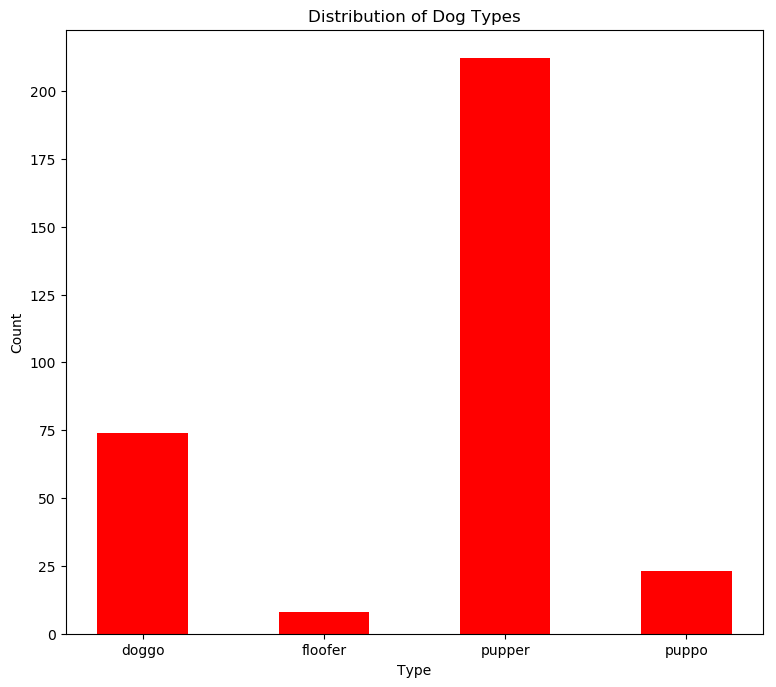

In [68]:
plt.figure(figsize=(9, 8), dpi= 100)
bar_width = 0.5
plt.title('Distribution of Dog Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.bar(adjusted_counts.index, adjusted_counts, bar_width,  color="red")
plt.show()

This visualization let's us see the drastic imbalance in the distribution of dog types. There are 200+ `pupper`. The next highest, `doggo` is less than half that amount.

### Most Common Breeds

Next I want to look at the most common breeds found by the neural network

In [69]:
counts = df.prediction.value_counts()[:10]
counts

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             38
malamute               29
Name: prediction, dtype: int64

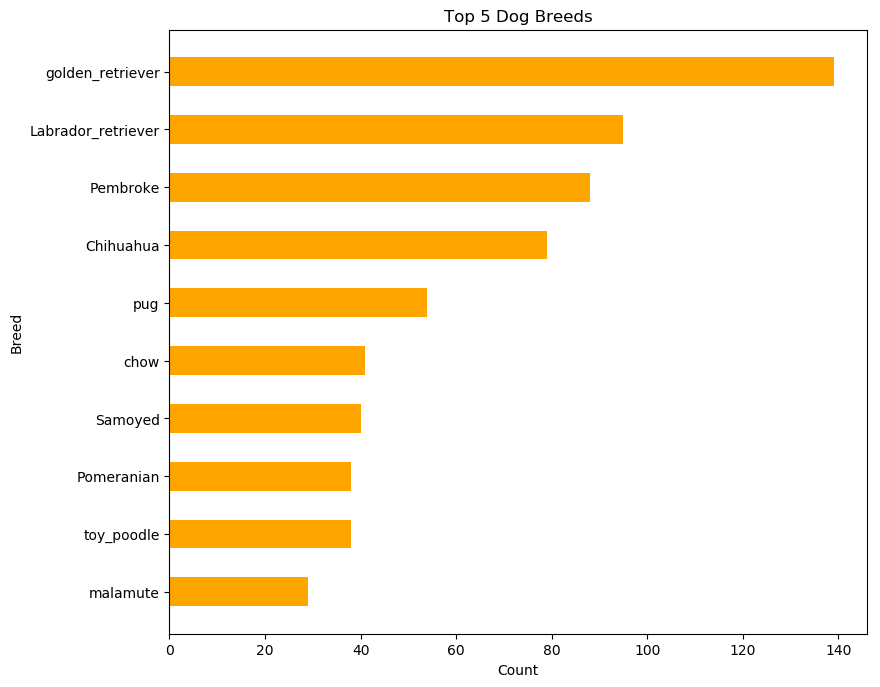

In [70]:
counts = counts[::-1] #reverse order for graph
plt.figure(figsize=(9, 8), dpi= 100)
bar_width = 0.5
plt.title('Top 5 Dog Breeds')
plt.xlabel('Count')
plt.ylabel('Breed')
plt.barh(counts.index, counts, bar_width,  color="orange")
plt.show()

Golden Retriever is in the lead by a huge margin. It makes sense because it's a very popular bree. It's followed by Labrador_retriever, Pembroke, Chihuahua very close to each other. Then the pug, which is expected because a lot of people find them cute. After that the remaining 5 breeds are very close to each other.

### Most Favourite Tweet

Next I want to see what are the tweet with the most favourites

In [71]:
idx_of_max = df.favorite_count.idxmax()
tweet = df.iloc[idx_of_max]
tweet

tweet_id                                                822872901745569793
in_reply_to_status_id                                                  N/a
in_reply_to_user_id                                                    N/a
timestamp                                              2017-01-21 18:26:02
source                                  http://twitter.com/download/iphone
text                     Here's a super supportive puppo participating ...
expanded_urls            https://twitter.com/dog_rates/status/822872901...
rating_numerator                                                        13
rating_denominator                                                      10
name                                                                   N/a
type                                                                 puppo
favorite_count                                                      132810
retweet_count                                                        48265
jpg_url                  

The highest favourited tweet had 132810 favourites and was about a `puppo`. It was tweeted in January, 2017. The prediction is Lakeland_terrier; however the confidince is low, and that's in fact a wrong classification.

Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc


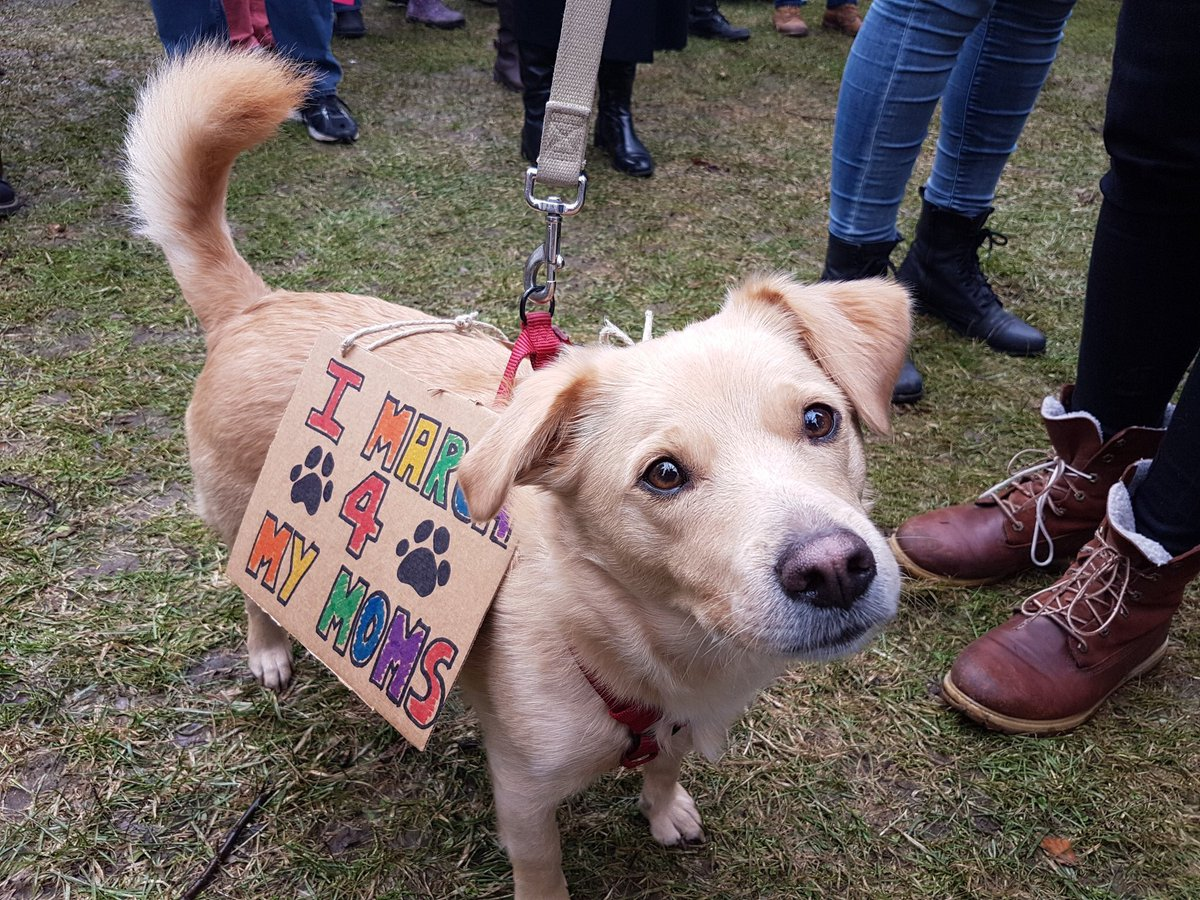

In [72]:
from IPython.display import Image
print(tweet.text)
Image('https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg', width=700, height=350)

From the text and picture, we can see that the highest favourited tweet is of a `puppo` during the Womens March. This is interesting because the high number of favourites is most likely due to the support of the Womens March political movement.

### Statistics Overtime

Last, I want to look at how the rewteets/favourites changed with time.


In [73]:
df['timestamp'] = pd.to_datetime(df.timestamp) #fix timestamp type
df2 = df.set_index('timestamp').sort_index() #make the df indexed by the timestamp and sort it acording to date
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1994 entries, 2015-11-15 22:32:08 to 2017-08-01 16:23:56
Data columns (total 16 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
type                     306 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
prediction               1994 non-null object
is_dog                   1994 non-null bool
prediction_conf          1994 non-null float64
dtypes: bool(1), float64(3), int64(3), object(9)
memory usage: 251.2+ KB


In [74]:
df2.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,prediction_conf
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,7.358508e+17,12.237101,10.532096,8895.725677,2766.753260,0.593941
std,6.747816e+16,41.471197,7.320710,12213.193181,4674.698447,0.271954
min,6.660209e+17,0.000000,2.000000,81.000000,16.000000,0.044333
25%,6.758475e+17,10.000000,10.000000,1982.000000,624.750000,0.362857
50%,7.084748e+17,11.000000,10.000000,4136.000000,1359.500000,0.587635
75%,7.877873e+17,12.000000,10.000000,11308.000000,3220.000000,0.846285
max,8.924206e+17,1776.000000,170.000000,132810.000000,79515.000000,1.000000


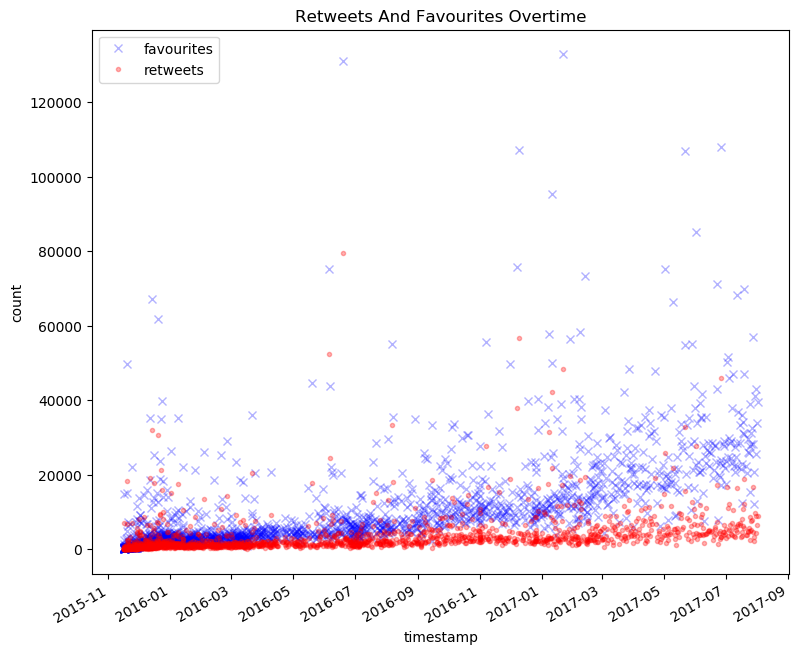

In [75]:
plt.figure(figsize=(9, 8), dpi= 100)
# # x = np.array([1,2,3,4])
# plt.plot(df2.index, df2['favorite_count'],  color="red")
plt.title('Retweets And Favourites Overtime')
plt.xlabel('date')
plt.ylabel('count')
# # plt.scatter(x, x,  color="black",alpha=0.4)
# # plt.scatter(x, x,  color="black",alpha=0.4)
# plt.show()
df2['favorite_count'].plot(c = 'blue', label='favourites', style='x', alpha=0.3)
df2['retweet_count'].plot(c = 'red', label='retweets', style='.', alpha=0.3)
plt.legend(loc='upper left')


We can see that there is concentration of low values from 2015-11 to 2016-09. After that, values start spreading apart and going higher. We can conclude that as time goes by, tweets are getting more retweets and favourites, although it's more obviouse for favourites. This makes sense, as the account is getting more and more popularity.

## Conclusion

WeRateDogs <a href='https://twitter.com/dog_rates'>(@dog_rates)</a> is a famous twitter account that rates dogs that people send. Rating are usually funny and include a non genric rating system using a rating higher than the scale, like 13/10. We gathered the data from 3 different sources: a tweet archive of this user, information from a dog classification neural network, and the twitter api. After wrangling the data and cleaning it, we analysed it to find out interesting patterns and insights.

<ul>
<li>Even though 'pupper' is the most common type of dog that is tweeted about, it is the one with the least average retweets AND leas average Favourites</li>
<li>It's more likely for people to favourite/like than retweet (for all types), and later tweets get more favourites and retweets in general</li>
<li>Favourites/Likes and retweets rise together and fall together, which makes since because retweets and favourites indicate interest in the photo, and in some cases same people retweet and favourite</li>
</ul>